# Lab 02. Introduction
Meteorological data is one of the most important data with high social (climate change, disastrous events etc.) and economical impact (climate change, flooding, drought, wildfire and other disastrous events etc.)
Envlib.org has extensive sets of New Zealand focused geospatial climate/environmental datasets that are easily accessible. In this course, we are going to use a 20 year numerical weather dataset provided by MetService that contains all the critical weather variables (wind speed, wind direction, near surface air temperature, soil moisture, atmospheric moisture, precipitation etc.).

## Read a netcdf file

Netcdf (Network Common Data Form) file (*.nc) is a format that is widely used across scientific deciplines. It supports "the creation, access, and sharing of array-oriented scientific data" (https://www.unidata.ucar.edu/software/netcdf/).

## New Libraries
### Xarray Python Library
https://docs.xarray.dev/en/stable/

### Salem 
"Salem is a small library to do geoscientific data processing and plotting. It extends xarray to add geolocalised subsetting, masking, and plotting operations to xarray’s DataArray and DataSet structures"
https://pypi.org/project/salem/

### Cartopy
"Cartopy is a Python package designed to make drawing maps for data analysis and visualisation as easy as possible."
https://pypi.org/project/Cartopy/

In [2]:
import xarray as xr
import numpy as np 
import salem 
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt

Let's explore the Metservice numerical weather model outputs on our local SEE-TRX4001 machine

In [3]:
ls /mnt/Metservice_WRF/

GLW_20000101000000.nc*     RH_20131201000000.nc*      TD_20070101000000.nc*
GLW_20000201000000.nc*     RH_20140101000000.nc*      TD_20070201000000.nc*
GLW_20000301000000.nc*     RH_20140201000000.nc*      TD_20070301000000.nc*
GLW_20000401000000.nc*     RH_20140301000000.nc*      TD_20070401000000.nc*
GLW_20000501000000.nc*     RH_20140401000000.nc*      TD_20070501000000.nc*
GLW_20000601000000.nc*     RH_20140501000000.nc*      TD_20070601000000.nc*
GLW_20000701000000.nc*     RH_20140601000000.nc*      TD_20070701000000.nc*
GLW_20000801000000.nc*     RH_20140701000000.nc*      TD_20070801000000.nc*
GLW_20000901000000.nc*     RH_20140801000000.nc*      TD_20070901000000.nc*
GLW_20001001000000.nc*     RH_20140901000000.nc*      TD_20071001000000.nc*
GLW_20001101000000.nc*     RH_20141001000000.nc*      TD_20071101000000.nc*
GLW_20001201000000.nc*     RH_20141101000000.nc*      TD_20071201000000.nc*
GLW_20010101000000.nc*     RH_20141201000000.nc*      TD_20080101000000.nc*
GLW_20010201

First, we need to use xarray to open/read the netcdf file. Using **open_dataset** function here. 

**TIP:** Another important function is **open_mfdataset** which can open multiple files and merge them automatically to a single dataset to use.

Dataset and dataarray are the fundamental data structures. Each dataarray object have dimensions associated with it and even some additional information in attributes.

In [4]:
ds = xr.open_dataset("/mnt/Metservice_WRF/RH_20200101000000.nc")

In [5]:
ds

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472, height: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0
Data variables:
    RH       (height, time, lat, lon) float32 ...

### Indexing of multi demensional data

In [6]:
ds.RH # each variable in a dataset is called a dataarray

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

In [7]:
ds["RH"] # another method to call the data array. I prefer ds.RH

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

#### Direct method

In [8]:
ds.RH[0,0,:,:] # selecting first height level, first time entry, all lat and all lon

<xarray.DataArray 'RH' (lat: 508, lon: 472)>
[239776 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [9]:
ds.RH[0,0,5:10,...]  # selecting first height, first time entry, lat startng at index 5 and ending at 10, and all lon
# find the shape of this new indexed data array

<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

#### isel method

In [10]:
ds.RH.isel(height=0,time=0) # isel = index selecting
# ds.RH[0,0,:,:] is this the same as above?

<xarray.DataArray 'RH' (lat: 508, lon: 472)>
[239776 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [11]:
ds.RH[0,0,5:10,...]

<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

In [12]:
ds.RH.isel(height=0,time=0,lat=range(5,10))
# ds.RH[0,0,5:10,...] is ths the same as above?

<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

### Task
 Rewrite the indexing ds.RH[0,0,5:10,:] using the isel method

In [13]:
ds.RH.isel(height=0,time=0,lat=range(5,10))


<xarray.DataArray 'RH' (lat: 5, lon: 472)>
array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 , 89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  , 89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 , 89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  , 89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625, 89.09961 ]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
  * lat      (lat) float64 -47.86 -47.83 -47.81 -47.78 -47.75
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 2.0

You can also use values to get only the values of the dataarray, the return values will be in a numpy array that has the same dimesion of the original data

In [14]:
ds.RH.isel(height=0,time=0,lat=range(5,10)).values # this returns values but looses the lat/lon information 

array([[86.049355, 85.780266, 85.60962 , ..., 89.3605  , 89.31947 ,
        89.27025 ],
       [86.15929 , 85.8902  , 85.70971 , ..., 89.31947 , 89.2801  ,
        89.22923 ],
       [86.259384, 85.99029 , 85.81964 , ..., 89.2801  , 89.24072 ,
        89.18985 ],
       [86.32993 , 86.080536, 85.91973 , ..., 89.24072 , 89.1997  ,
        89.150475],
       [86.369316, 86.15929 , 86.00014 , ..., 89.18985 , 89.140625,
        89.09961 ]], dtype=float32)

#### sel method

In [15]:
ds.sel(lat=slice(-40,-35),time=slice("2020-01-03","2020-01-10")) # can we now see the power of this technique?

<xarray.Dataset>
Dimensions:  (time: 192, lat: 182, lon: 472, height: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 ... 2020-01-10T23:00:00
  * lat      (lat) float64 -40.0 -39.97 -39.94 -39.91 ... -35.06 -35.03 -35.0
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0
Data variables:
    RH       (height, time, lat, lon) float32 ...

In [16]:
ds.sel(lat=slice(-40,-35),time=slice("2020-01-03","2020-01-10")).time

<xarray.DataArray 'time' (time: 192)>
array(['2020-01-03T00:00:00.000000000', '2020-01-03T01:00:00.000000000',
       '2020-01-03T02:00:00.000000000', '2020-01-03T03:00:00.000000000',
       '2020-01-03T04:00:00.000000000', '2020-01-03T05:00:00.000000000',
       '2020-01-03T06:00:00.000000000', '2020-01-03T07:00:00.000000000',
       '2020-01-03T08:00:00.000000000', '2020-01-03T09:00:00.000000000',
       '2020-01-03T10:00:00.000000000', '2020-01-03T11:00:00.000000000',
       '2020-01-03T12:00:00.000000000', '2020-01-03T13:00:00.000000000',
       '2020-01-03T14:00:00.000000000', '2020-01-03T15:00:00.000000000',
       '2020-01-03T16:00:00.000000000', '2020-01-03T17:00:00.000000000',
       '2020-01-03T18:00:00.000000000', '2020-01-03T19:00:00.000000000',
       '2020-01-03T20:00:00.000000000', '2020-01-03T21:00:00.000000000',
       '2020-01-03T22:00:00.000000000', '2020-01-03T23:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-04T01:00:00.000000000',
       '2020-01-04T02:00:00.000000000', '2020-01-04T03:00:00.000000000',
       '2020-01-04T04:00:00.000000000', '2020-01-04T05:00:00.000000000',
       '2020-01-04T06:00:00.000000000', '2020-01-04T07:00:00.000000000',
       '2020-01-04T08:00:00.000000000', '2020-01-04T09:00:00.000000000',
       '2020-01-04T10:00:00.000000000', '2020-01-04T11:00:00.000000000',
       '2020-01-04T12:00:00.000000000', '2020-01-04T13:00:00.000000000',
       '2020-01-04T14:00:00.000000000', '2020-01-04T15:00:00.000000000',
       '2020-01-04T16:00:00.000000000', '2020-01-04T17:00:00.000000000',
       '2020-01-04T18:00:00.000000000', '2020-01-04T19:00:00.000000000',
       '2020-01-04T20:00:00.000000000', '2020-01-04T21:00:00.000000000',
       '2020-01-04T22:00:00.000000000', '2020-01-04T23:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-05T01:00:00.000000000',
       '2020-01-05T02:00:00.000000000', '2020-01-05T03:00:00.000000000',
       '2020-01-05T04:00:00.000000000', '2020-01-05T05:00:00.000000000',
       '2020-01-05T06:00:00.000000000', '2020-01-05T07:00:00.000000000',
       '2020-01-05T08:00:00.000000000', '2020-01-05T09:00:00.000000000',
       '2020-01-05T10:00:00.000000000', '2020-01-05T11:00:00.000000000',
       '2020-01-05T12:00:00.000000000', '2020-01-05T13:00:00.000000000',
       '2020-01-05T14:00:00.000000000', '2020-01-05T15:00:00.000000000',
       '2020-01-05T16:00:00.000000000', '2020-01-05T17:00:00.000000000',
       '2020-01-05T18:00:00.000000000', '2020-01-05T19:00:00.000000000',
       '2020-01-05T20:00:00.000000000', '2020-01-05T21:00:00.000000000',
       '2020-01-05T22:00:00.000000000', '2020-01-05T23:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-06T01:00:00.000000000',
       '2020-01-06T02:00:00.000000000', '2020-01-06T03:00:00.000000000',
       '2020-01-06T04:00:00.000000000', '2020-01-06T05:00:00.000000000',
       '2020-01-06T06:00:00.000000000', '2020-01-06T07:00:00.000000000',
       '2020-01-06T08:00:00.000000000', '2020-01-06T09:00:00.000000000',
       '2020-01-06T10:00:00.000000000', '2020-01-06T11:00:00.000000000',
       '2020-01-06T12:00:00.000000000', '2020-01-06T13:00:00.000000000',
       '2020-01-06T14:00:00.000000000', '2020-01-06T15:00:00.000000000',
       '2020-01-06T16:00:00.000000000', '2020-01-06T17:00:00.000000000',
       '2020-01-06T18:00:00.000000000', '2020-01-06T19:00:00.000000000',
       '2020-01-06T20:00:00.000000000', '2020-01-06T21:00:00.000000000',
       '2020-01-06T22:00:00.000000000', '2020-01-06T23:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-07T01:00:00.000000000',
       '2020-01-07T02:00:00.000000000', '2020-01-07T03:00:00.000000000',
       '2020-01-07T04:00:00.000000000', '2020-01-07T05:00:00.000000000',
       '2020-01-07T06:00:00.000000000', '2020-01-07T07:00:00.000000000',
       '2020-01-07T08:00:00.000000000', '2020-01-07T09:00:00.000000000',
       '2020-01-07T10:00:00.000000000', '2020-01-07T11:00:00.000000000',
       '2020-01-07T1

In [17]:
ds.sel(time=slice("2020-01-03","2020-01-10"),lat=slice(-40,-35)) # notice the order of the calls. started with "time" this time

<xarray.Dataset>
Dimensions:  (time: 192, lat: 182, lon: 472, height: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 ... 2020-01-10T23:00:00
  * lat      (lat) float64 -40.0 -39.97 -39.94 -39.91 ... -35.06 -35.03 -35.0
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0
Data variables:
    RH       (height, time, lat, lon) float32 ...

### 1D data plotting

In [ ]:
# Matplotlib cheat sheet : https://matplotlib.org/cheatsheets/

In [18]:
ds.RH

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

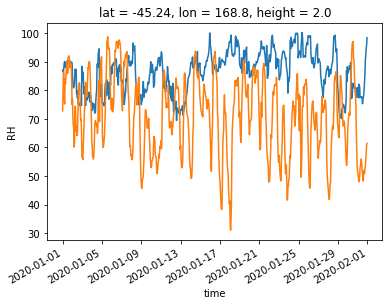

In [20]:
ds.RH[0,:,10,10].plot()
ds.RH[0,:,100,100].plot()

Text(0, 0.5, 'RH (%)')

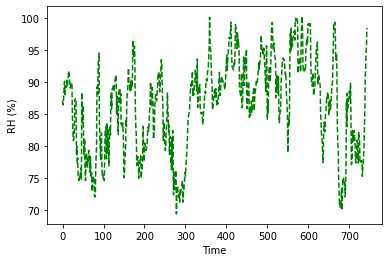

In [22]:
plt.plot(ds.RH[0,:,10,10],'g--')
plt.xlabel("Time")
plt.ylabel("RH (%)")

Text(0, 0.5, 'RH (%)')

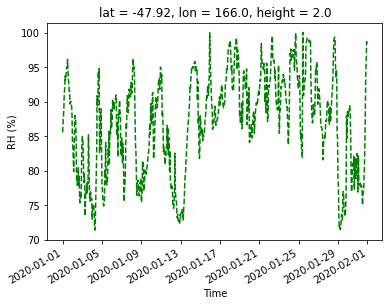

In [23]:
ds.RH[0, :, 3, 1].plot(linestyle="dashed", color="green")
plt.xlabel("Time")
plt.ylabel("RH (%)")

Text(0.5, 1.0, 'This is a time series for Relative Humidity')

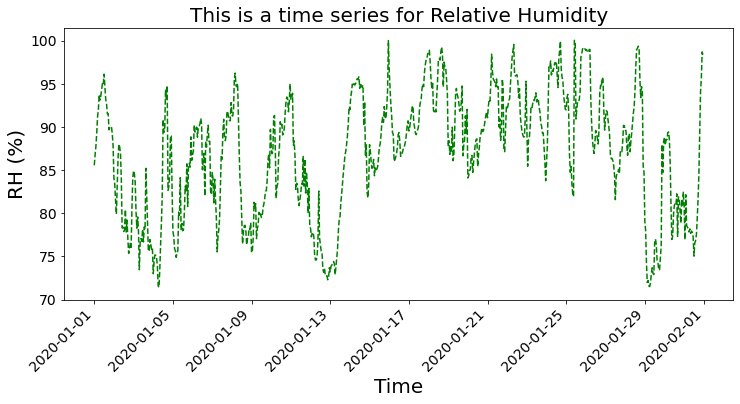

In [24]:
ds.RH[0, :, 3, 1].plot(linestyle="dashed", color="green",figsize=(12,5))
plt.xlabel("Time",fontsize=20)
plt.ylabel("RH (%)",fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14,rotation=0)
plt.title("This is a time series for Relative Humidity",fontsize=20)

#### Task
Use the sel method to select and plot the time series (nearest to your house in NZ) for the days of 2020-01-01 and 2020-01-10 (UTC).

In [25]:
ds_time_slice=ds.RH.sel(time=slice("2020-01-01","2020-01-10")) # it is important to time slice before sel with nearest neighbour option

Text(0.5, 1.0, 'This is a time series for Relative Humidity')

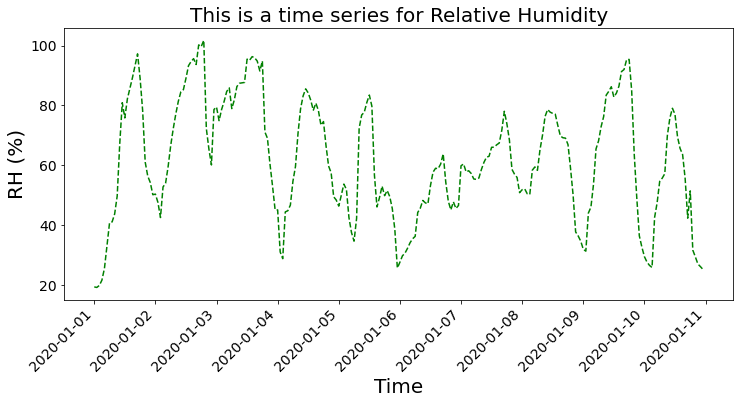

In [26]:
ds_time_slice.sel(lat=-43.5,lon=172,method="nearest").plot(linestyle="dashed", color="green",figsize=(12,5))
plt.xlabel("Time",fontsize=20)
plt.ylabel("RH (%)",fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14,rotation=0)
plt.title("This is a time series for Relative Humidity",fontsize=20)

In [8]:
# The following comapres Greymouth VS Christchurch meteorology for the month of January, 2020.

In [9]:
# Let's start by extracting temperature and relative humidity values into an xarray dataset

In [27]:
ds_RH = xr.open_dataset("/mnt/Metservice_WRF/RH_20200101000000.nc")
ds_T  = xr.open_dataset("/mnt/Metservice_WRF/T_20200101000000.nc")

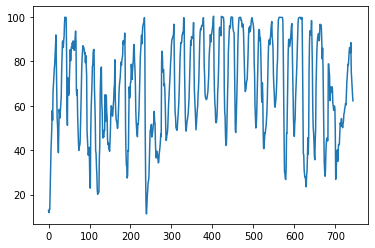

In [28]:
# plotting time series for RH for ChCh city
plt.plot(ds_RH.RH.sel(height=2,lat=-43.5,lon=172.61,method="nearest"))

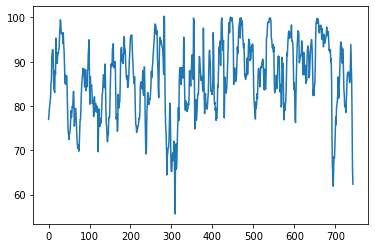

In [30]:
# plotting time series for RH for Greymouth city
plt.plot(ds_RH.RH.sel(height=2,lat=-42.46,lon=171.25,method="nearest"))

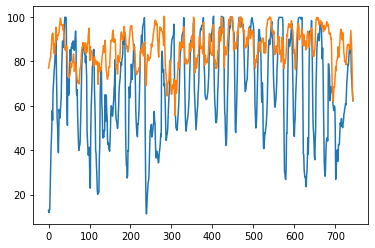

In [31]:
# What do the following do when executed??
plt.plot(ds_RH.RH.sel(height=2,lat=-43.5,lon=172.61,method="nearest"))
plt.plot(ds_RH.RH.sel(height=2,lat=-42.46,lon=171.25,method="nearest"))

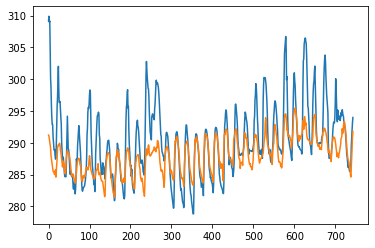

In [12]:
plt.plot(ds_T.T.sel(height=2,lat=-43.5,lon=172.61,method="nearest"))
plt.plot(ds_T.T.sel(height=2,lat=-42.46,lon=171.25,method="nearest"))

### Making spatial maps

In [32]:
ds.RH

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

In [33]:
ds.RH

<xarray.DataArray 'RH' (height: 1, time: 744, lat: 508, lon: 472)>
[178393344 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0

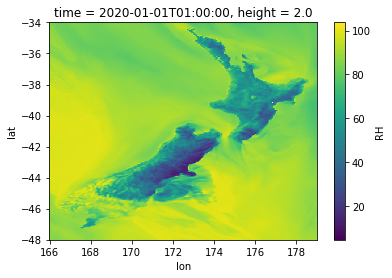

In [34]:
ds.RH[0,1,...].plot()

Default plotting will have projection issues. You can use the "salem" library functions we imported earlier to help you handle the projection issue automatically.

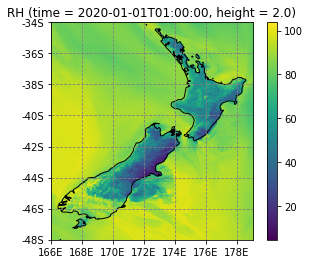

In [35]:
ds.RH[0,1,:,:].salem.quick_map()

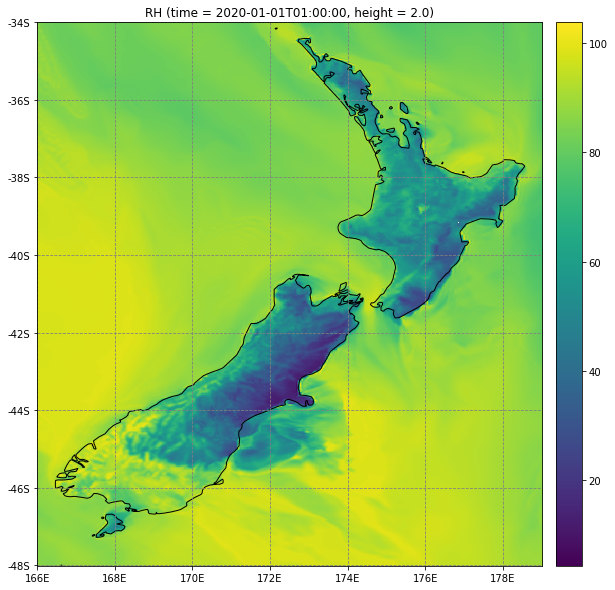

In [36]:
ds.RH[0,1,:,:].salem.quick_map()
# set size of salem quick_map
plt.gcf().set_size_inches(10,10)

#### Task
1. Basic map plotting
    1. Change the color to a different colormap (https://matplotlib.org/stable/tutorials/colors/colormaps.html; https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    2. Change the range of the colormap to 20 (minimum) and 100 (maximum).
2. Inspect the spatial change in the magnitude of RH throughout the first hour of 2020-01-01. Plot the histgram of the whole day. (hint: You need to select the data of that day before using hist plotting function)

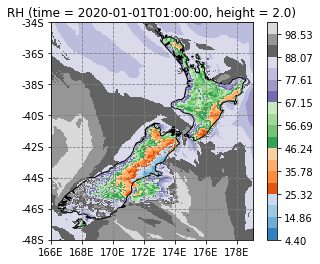

In [37]:
ds.RH[0,1,...].salem.quick_map(cmap='tab20c')

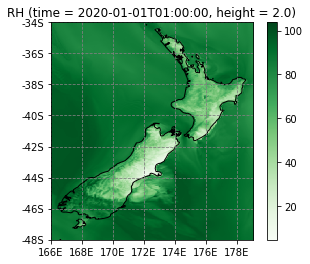

In [39]:
ds.RH[0,1,...].salem.quick_map(cmap='Greens')

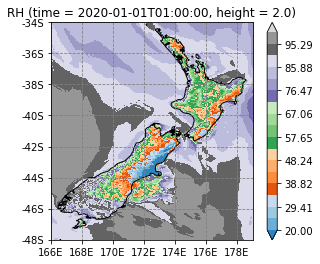

In [40]:
ds.RH[0,1,...].salem.quick_map(cmap='tab20c',vmin=20,vmax=100)

(array([   328.,   1719.,   3128.,   4659.,   7602.,   9188.,   6950.,
         43044., 106879.,  56278.]),
 array([  4.3997383,  14.335782 ,  24.271826 ,  34.20787  ,  44.143913 ,
         54.079956 ,  64.016    ,  73.95205  ,  83.88809  ,  93.824135 ,
        103.76018  ], dtype=float32),
 <BarContainer object of 10 artists>)

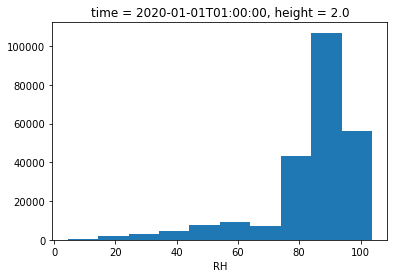

In [41]:
# What does this histogram represent/mean?
ds.RH[0,1,...].plot.hist()


(array([1.7000e+01, 4.0200e+02, 7.1200e+02, 8.2300e+02, 1.3140e+03,
        1.8210e+03, 2.2050e+03, 2.4140e+03, 3.3140e+03, 4.6370e+03,
        4.7420e+03, 3.9870e+03, 3.4440e+03, 3.5100e+03, 5.8910e+03,
        3.7386e+04, 5.7152e+04, 4.8808e+04, 5.2814e+04, 4.3800e+03]),
 array([  5.379299,  10.306301,  15.233303,  20.160305,  25.087307,
         30.014309,  34.94131 ,  39.868313,  44.795315,  49.722317,
         54.649323,  59.576324,  64.50333 ,  69.43033 ,  74.35733 ,
         79.28433 ,  84.211334,  89.138336,  94.06534 ,  98.99234 ,
        103.91934 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7efccdf27310>])

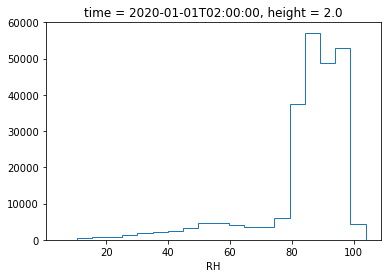

In [42]:
ds.RH[0,2,...].plot.hist(bins=20,histtype='step')

(array([ 8.,  6., 15., 24., 33., 19., 42., 86., 59., 60., 94., 42., 57.,
        17., 27., 59., 47., 23., 14., 12.]),
 array([290.37018, 290.64767, 290.92517, 291.20267, 291.48016, 291.75763,
        292.03513, 292.31262, 292.59012, 292.8676 , 293.1451 , 293.4226 ,
        293.7001 , 293.9776 , 294.2551 , 294.5326 , 294.81006, 295.08755,
        295.36505, 295.64255, 295.92004], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7efccdec9c40>])

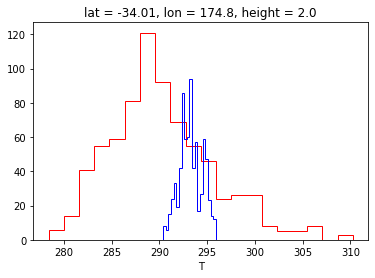

In [43]:
ds_T = xr.open_dataset("/mnt/Metservice_WRF/T_20200101000000.nc")
# What is Christchurch lat/long?
ds_T.T.sel(height=2,lat=-43.5320,lon=172.6366,method="nearest").plot.hist(bins=20,histtype='step',color="red")
# What is Auckland lat/long?
ds_T.T.sel(height=2,lat=36.8509,lon=174.7645,method="nearest").plot.hist(bins=20,histtype='step',color="blue")

### More maps

#### Subplots 

In [44]:
import matplotlib.pyplot as plt

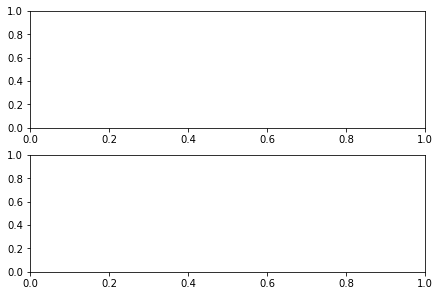

In [46]:
fig,axes = plt.subplots(2,constrained_layout=True) #vertically stacking subplots

"An Axes is attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel())."  (https://matplotlib.org/stable/tutorials/introductory/usage.html)

In [47]:
axes[0].set_title("Plot 1")
axes[1].set_title("Plot 2")

Text(0.5, 1.0, 'Plot 2')

In [48]:
fig.axes[0].set_ylabel("RH (%)")
fig.axes[1].set_ylabel("T (Kelvin)")

Text(3.1999999999999993, 0.5, 'T (Kelvin)')

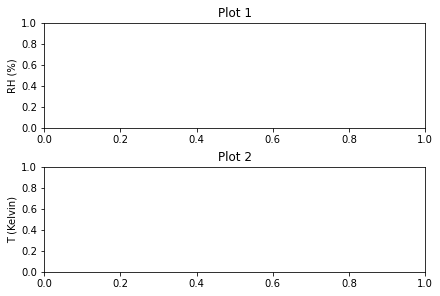

In [49]:
fig

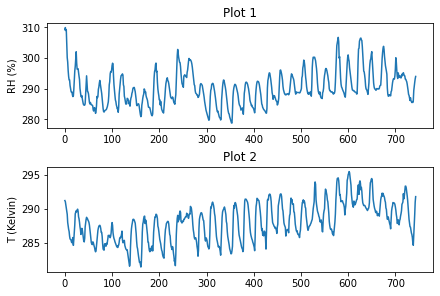

In [50]:
# Let's practice on the Greymouth and ChCh temperature timeseries we saw earlier
axes[0].plot(ds_T.T.sel(height=2,lat=-43.5,lon=172.61,method="nearest"))
axes[1].plot(ds_T.T.sel(height=2,lat=-42.46,lon=171.25,method="nearest"))
fig

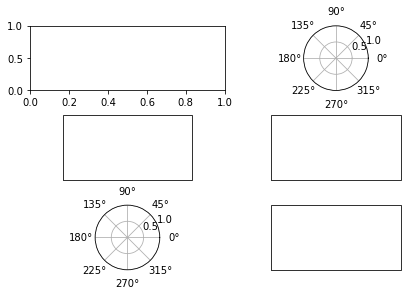

In [51]:
fig = plt.figure(constrained_layout=True)
ax1 = plt.subplot(321)
ax2 = plt.subplot(322, projection='polar')
ax3 = plt.subplot(323, projection=ccrs.PlateCarree())
ax4 = plt.subplot(324, projection=ccrs.PlateCarree())
ax5 = plt.subplot(325, projection='polar')
ax6 = plt.subplot(326, projection=ccrs.PlateCarree())

#### Using cartopy with salem

In [ ]:
# Check out all the map projection options avaiable in cartopy https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

/opt/conda/envs/baseline/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


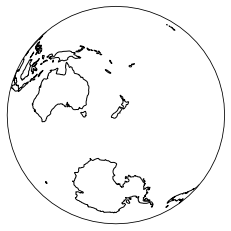

In [52]:
# The "projection keyword"
# "the projection of your axes is independent of the coordinate system your data is defined in. The projection argument 
# is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like)"
ax = plt.axes(projection=ccrs.Orthographic(170, -45)) # 170, -45 are central long and lat
ax.coastlines()
# Try changing the central long/lat and also the projectio system and rerun the code abve

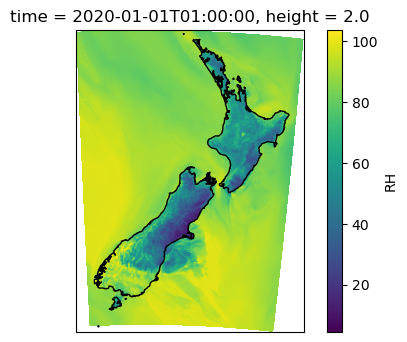

In [54]:
# The "projection keyword"
# "the projection of your axes is independent of the coordinate system your data is defined in. The projection argument 
# is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like)"
ax = plt.axes(projection=ccrs.Orthographic(170, -45)) # 170, -45 are central long and lat
ax.coastlines()

# The "transform keyword"
# The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in"
ds.RH[0,1,...].plot(transform=ds.salem.cartopy()) # salem can find the crs from the data

fig = plt.gcf()
fig.set_dpi(100)

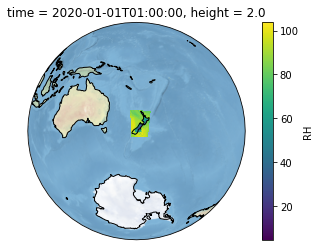

In [58]:
ax = plt.axes(projection=ccrs.Orthographic(170, -45))
ax.set_global();
ds.RH[0,1,...].plot(ax=ax, transform=ds.salem.cartopy());
ax.coastlines();
ax.stock_img()

/opt/conda/envs/baseline/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


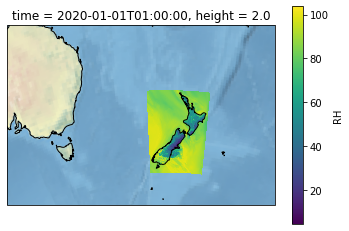

In [59]:
ax = plt.axes(projection=ccrs.Orthographic(170, -45))
ax.set_global();
ds.RH[0,1,...].plot(ax=ax, transform=ds.salem.cartopy());
ax.coastlines();
ax.set_extent((140,-170,-20,-50))
ax.stock_img()

### Plotting maps with different methods

#### Method 1 using cartopy

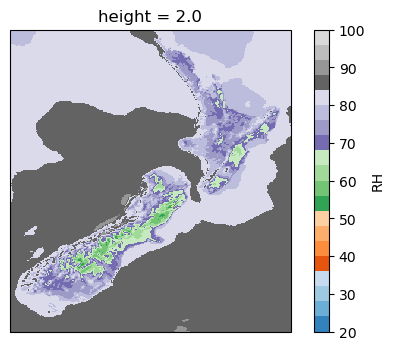

In [56]:
plt.figure(dpi=100)
ax=plt.axes(projection= ccrs.PlateCarree(170)) # check out more projection types from: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
ds.RH.mean(dim="time").plot(ax=ax,transform=ccrs.PlateCarree(170),robust=True,vmin=20,vmax=100,cmap='tab20c')

#### Method 2 using cartopy and salem

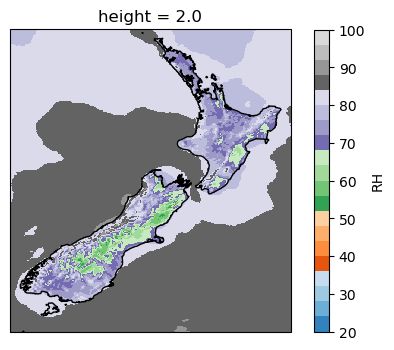

In [57]:
ax = plt.axes(projection=ccrs.PlateCarree(170)) # check out more projection types from: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
ds.RH.mean(dim="time").plot(ax=ax, transform=ds.salem.cartopy(),vmin=20,vmax=100, cmap='tab20c') # salem can find the crs from the data
ax.coastlines()
fig = plt.gcf()
fig.set_dpi(100)

You can also write your own calculalation using mathematical operators. Xarray will by default apply the operator by matching indeces.

### Task
Start with Assignment 1b

### Useful materials (Optional for curious minds)
If you are interested in how to produce nice maps, there are some nice resources you can look into.
1. https://youtu.be/6gdNUDs6QPc?list=PLlHygLBrUU2iDSU-5iGu6Qd6vjV6aDqF2 "Anatomy of Matplotlib". This video is a scipy conference workshop recording delivered by the contributors who developed the matplotlib library. Matplotlib is the library that works underneath the above functions that plot the figures.
2. Tutorials for xarray (https://docs.xarray.dev/en/stable/tutorials-and-videos.html).
3. https://github.com/SciTools/cartopy-tutorial is a good tutorial for cartopy with the accompanied tutorial video (https://www.youtube.com/watch?v=TE4uXbkHK_Y&t=3121s)